## Matplotlib

* http://matplotlib.org
* http://seaborn.pydata.org


### 기본 그래프

* 막대 그래프(bar), 선 그래프(line), 산포도(scatter), 상자 그래프(box), 히스토그램
* 질적 데이터
    * 요약 방법 : 도표
    * 정리 방법 : 도수 분포표, 분할표
    * 그래프 : 막대 그래프, 원 그래프...
    
* 양적 데이터
    * 요약 방법 : 수치
    * 정리 방법 : 산술 평균, 중앙값
    * 그래프 : 히스토그램, Boxplot, 시계열 그래프, 산포도(산점도)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

# 한글 폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family = font_name)

# 마이너스(-) 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

### 선 그래프

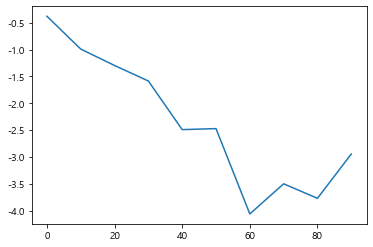

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
#s.plot()
s.plot.line()

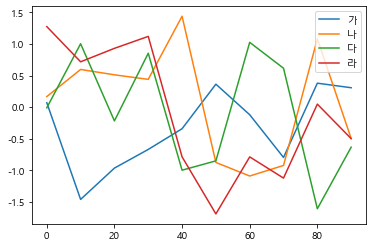

In [3]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns = ['가', '나', '다', '라'],
                  index = np.arange(0, 100, 10))

df1.plot()

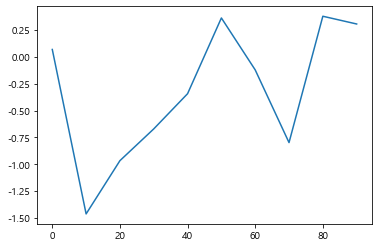

In [4]:
df1['가'].plot()

### 막대 그래프

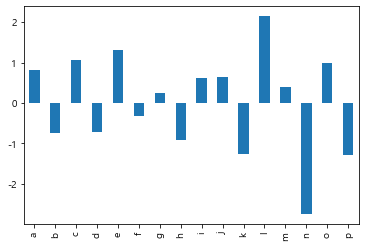

In [5]:
s2 = pd.Series(np.random.randn(16), index = list('abcdefghijklmnop'))
s2.plot(kind = 'bar')

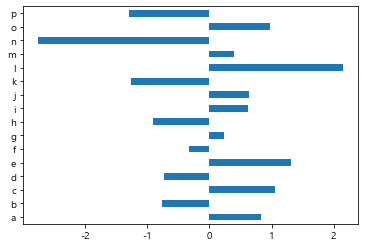

In [6]:
s2.plot(kind = 'barh')

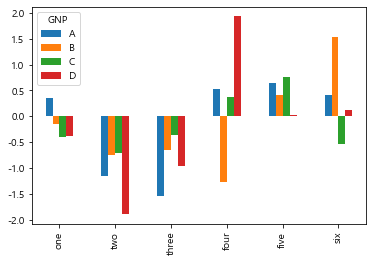

In [7]:
df2 = pd.DataFrame(np.random.randn(6, 4),
                  index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'GNP'))
df2.plot(kind = 'bar')

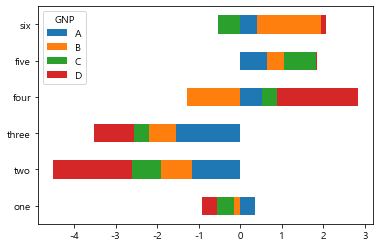

In [8]:
df2.plot(kind='barh', stacked = True)

### 히스토그램

* x 변수가 가질 수 있는 값의 범우
* 값만 필요. 인덱스 필요 없음

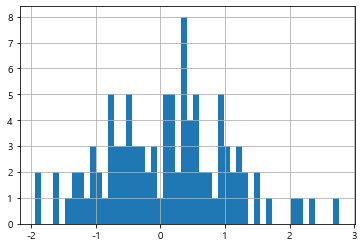

In [9]:
s3 = pd.Series(np.random.normal(0, 1, size = 100))
s3.hist(bins = 50)

### 산포도(산점도, scatter)

* 두 변수의 관계(양, 음)

In [10]:
x1 = np.random.normal(1, 1, size = (100, 1))
x2 = np.random.normal(-2, 4, size = (100, 1))

x = np.concatenate((x1, x2), axis = 1)
print(x[:5])

df3 = pd.DataFrame(x, columns = ['x1', 'x2'])
df3.head()

[[ -0.1091386  -12.97696062]
 [  0.90190352  -5.10889709]
 [ -0.65641621  -7.71658799]
 [  1.37292533  -1.72515262]
 [  2.15569103   1.696169  ]]


,x1,x2
0,-0.109139,-12.976961
1,0.901904,-5.108897
2,-0.656416,-7.716588
3,1.372925,-1.725153
4,2.155691,1.696169


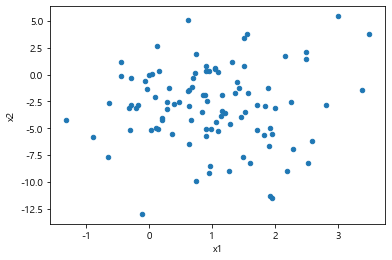

In [11]:
df3.plot.scatter('x1', 'x2')

### Box plot

* 연속형 변수와 이산형 변수를 함께 그리는 그래프
* 다변량 그래프

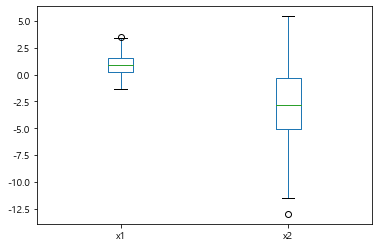

In [12]:
df3.plot.box()

### 좀 더 정교한 그래프

In [13]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

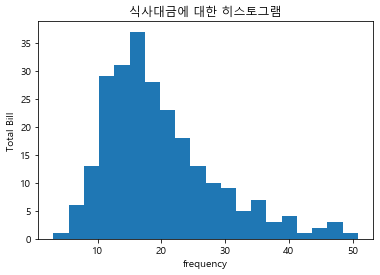

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# total_bill에 금액 분포를 확인
ax.hist(tips['total_bill'], bins = 20)   # bins : 막대 갯수
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

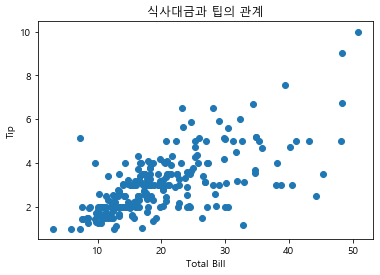

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips['total_bill'], tips['tip'])
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

In [16]:
def record_sex(sex) :
    if sex == 'Female' :
        return 0
    else :
        return 1
    
tips['sex_color'] = tips['sex'].apply(record_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

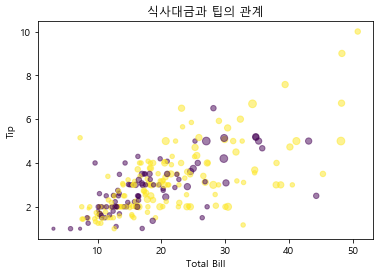

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

## c : 색깔
## s : 크기
## alpha : 투명도(0 : 투명, 1 : 불투명)
ax.scatter(tips['total_bill'], tips['tip'], c = tips['sex_color'],
          s = tips['size']*10, alpha = 0.5)


ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.0, '성별에 따른 팁의 관계')

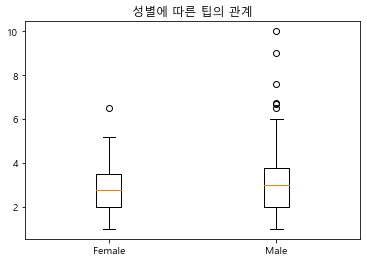

In [18]:
# 성별과 tip의 관계

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips['sex'] == 'Female']['tip'], 
          tips[tips['sex'] == 'Male']['tip']], labels = ['Female', 'Male'])


ax.set_title('성별에 따른 팁의 관계')

### seaborn

In [19]:
tips = sns.load_dataset('tips')

Text(0, 0.5, 'Tip')

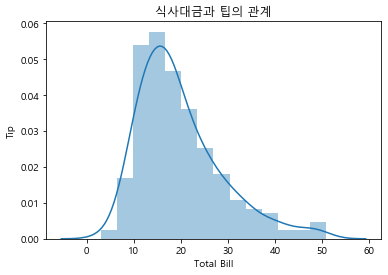

In [20]:
ax = plt.subplot()

# total_bill에 대한 금액 확인
ax = sns.distplot(tips['total_bill'])
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Total Bill')

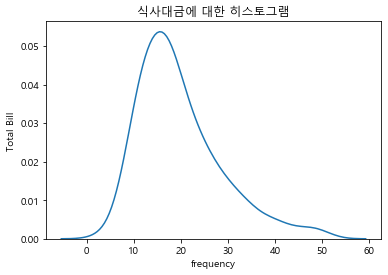

In [21]:
ax = plt.subplot()

# total_bill에 금액 분포 확인
ax = sns.distplot(tips['total_bill'], hist = False) # hist=false : 분포곡선 출력
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

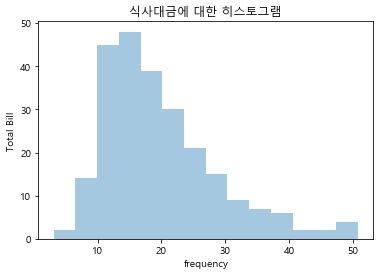

In [22]:
ax = plt.subplot()

# total_bill에 금액 분포 확인
ax = sns.distplot(tips['total_bill'], kde = False)  # kde=false : 히스토그램 출력
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

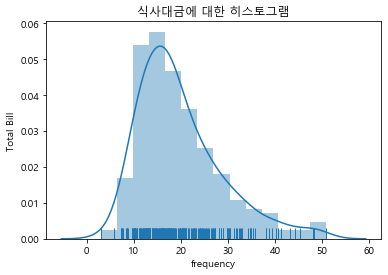

In [23]:
ax = plt.subplot()

# total_bill에 금액 분포 확인
ax = sns.distplot(tips['total_bill'], rug = True)  # rug : 실제 데이터들 위치
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

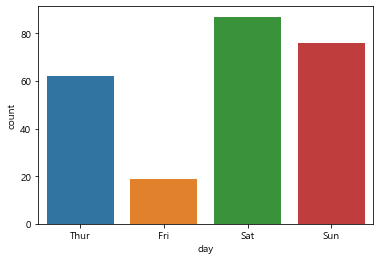

In [24]:
# 요일별로 팁의 빈도수 확인

sns.countplot('day', data=tips)

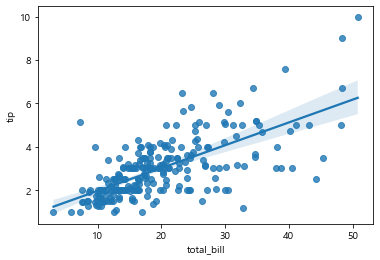

In [25]:
# Tip과 Total Bill의 관계를 알고 싶다
sns.regplot(x='total_bill', y = 'tip', data = tips)

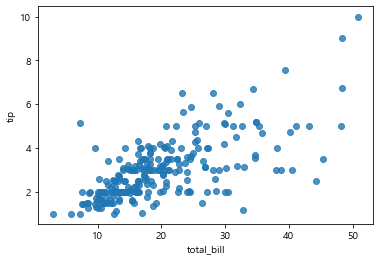

In [26]:
sns.regplot(x='total_bill', y = 'tip', data = tips,
           fit_reg = False)   # 회귀선 삭제

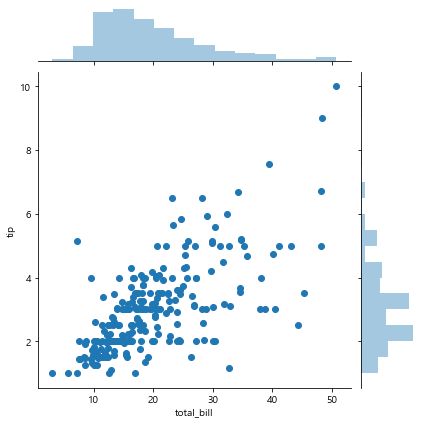

In [27]:
# jointplot : 히스토그랩과 산포토를 join

sns.jointplot(x='total_bill', y = 'tip', data = tips)

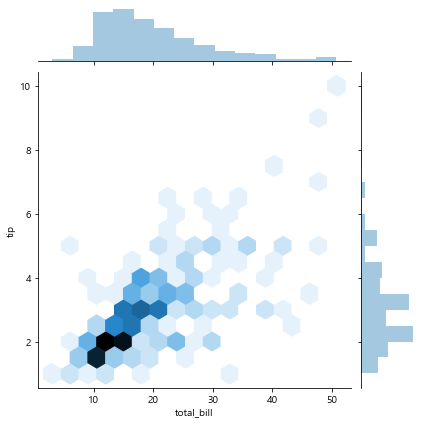

In [28]:
## kind='hex' : 육각형으로 표현

sns.jointplot(x='total_bill', y = 'tip', data = tips, kind = 'hex')

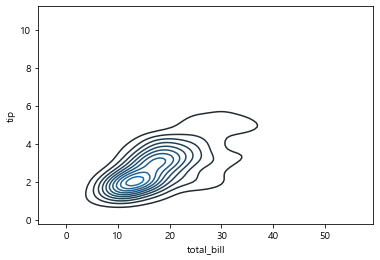

In [29]:
# kdeplot : 확률 밀도 추정 그래프

sns.kdeplot(data=tips['total_bill'], data2 = tips['tip'])

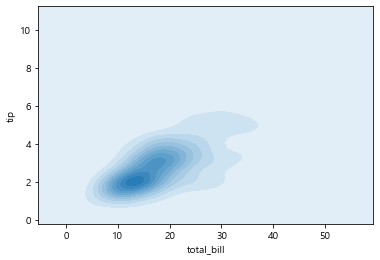

In [30]:
sns.kdeplot(data=tips['total_bill'], data2 = tips['tip'],
           shade = True)

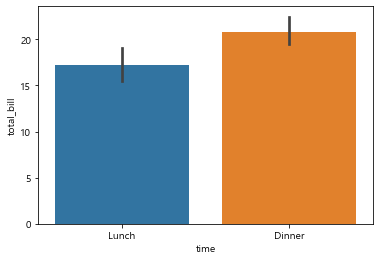

In [31]:
sns.barplot(x='time', y='total_bill', data=tips)

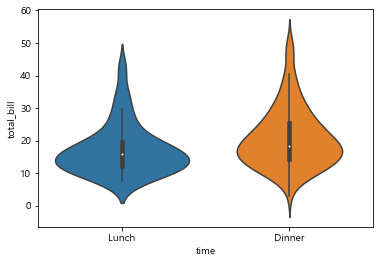

In [32]:
sns.violinplot(x='time', y='total_bill', data=tips)

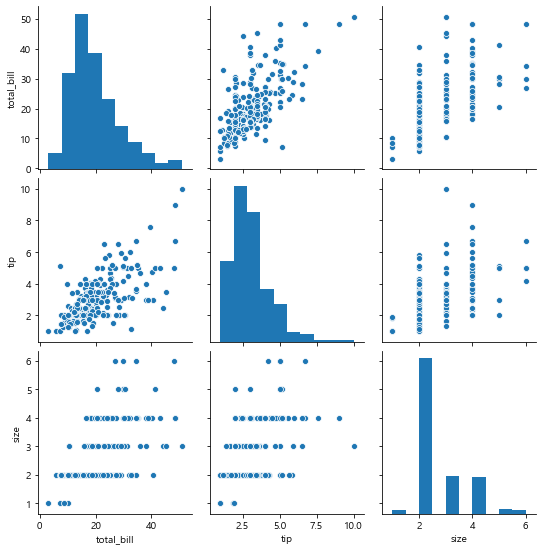

In [33]:
sns.pairplot(tips)

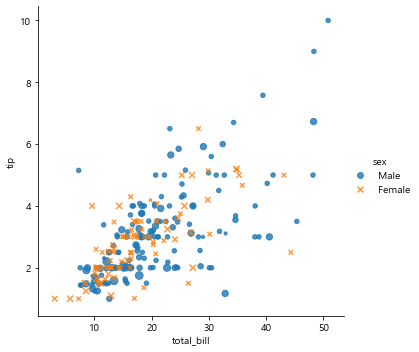

In [34]:
# 성별로 전체 식사대금과 팁의 관계를 확인
## hue : 범례 생성
## markers : 포인터 모양
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, 
          fit_reg = False, hue = 'sex', scatter_kws = {'s':tips['size']*10},
          markers = ['o', 'x'])

## 지도 시각화

* pip install folium

In [35]:
import folium

In [36]:
map = folium.Map(location = [37.493079, 126.752793])
map = folium.Map(location = [37.493079, 126.752793], zoom_start=15)  # 확대
map = folium.Map(location = [37.493079, 126.752793], zoom_start=15,
          tiles = 'Stamen Toner')   # 흑백으로

map

In [37]:
state_unemp = pd.read_csv('data/map/folium_US_Unemployment_Oct2012.csv')
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [43]:
map = folium.Map(location=[40, -98], zoom_start = 4)

## choropleth : 지도에 표현하고 싶은 데이터 입력
## key_on : 지도의 id 입력. 중복 불가
## fill_color : 색 지정

state_geo = 'data/map/folium_us-states.json'
map.choropleth(geo_data = state_geo, data = state_unemp,
              key_on = 'feature.id',
              columns = ['State', 'Unemployment'],
              fill_color = 'YlGn')
map

In [50]:
# Marker : 지도에 마커 표시
## add_to() : 어디에 마커를 추가할 것인가
## popup : 팝업 작성

map = folium.Map(location = [37.500656, 127.035926], zoom_start=15)

folium.Marker(location = [37.500656, 127.035926], popup = 'yeoksam station',
             icon = folium.Icon(color = 'red', icon = 'star')).add_to(map)


# CircleMarker : 원으로 범위 표현. icon 지정이 따로 필요 없음
# radiums : 반지름

folium.CircleMarker(location = [37.500656, 127.035926],
                    popup = 'yeoksam station',
                    radius = 50, color = '#ffffgg',
                    fill_color = '#fffggg').add_to(map)

map

## WordCloud

* pip install wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS

In [55]:
text = open('data/word/constitution.txt')
text = text.read()
text[:100]

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure'

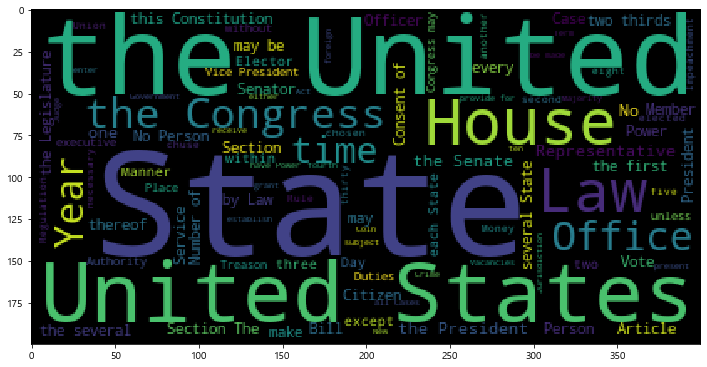

In [65]:
wc = WordCloud().generate(text)
dir(wc)
wc.words_

plt.figure(figsize = (12, 12))
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

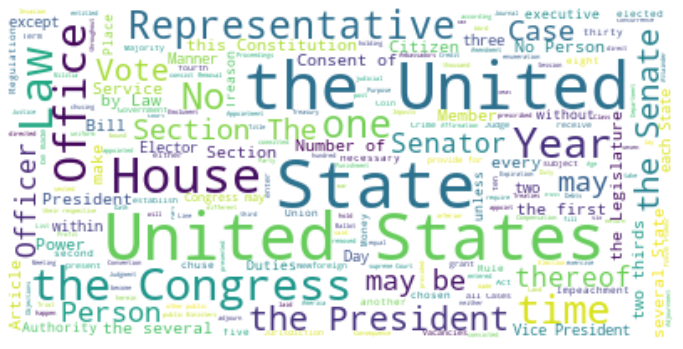

In [69]:
# WordCloud().generate(데이터)
## max_font_size : 글자 폰트 최대치 설정
## background_color : 배경색 설정
## figsize : 이미지 사이즈 지정
## interpolation : 이미지 부드럽기 정도
## axis : x, y축 숫자 제거

wc = WordCloud(max_font_size = 40, background_color = 'white').generate(text)
dir(wc)
wc.words_

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

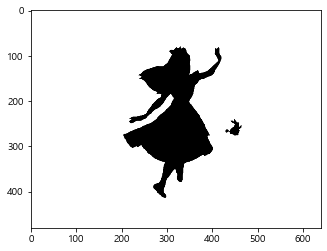

In [72]:
from PIL import Image

alice_mask = np.array(Image.open('data/word/alice_mask.png'))
alice_mask

plt.imshow(alice_mask)

In [73]:
text = open('data/word/alice.txt').read()
text[:100]

"癤풮roject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use o"

(-0.5, 639.5, 479.5, -0.5)

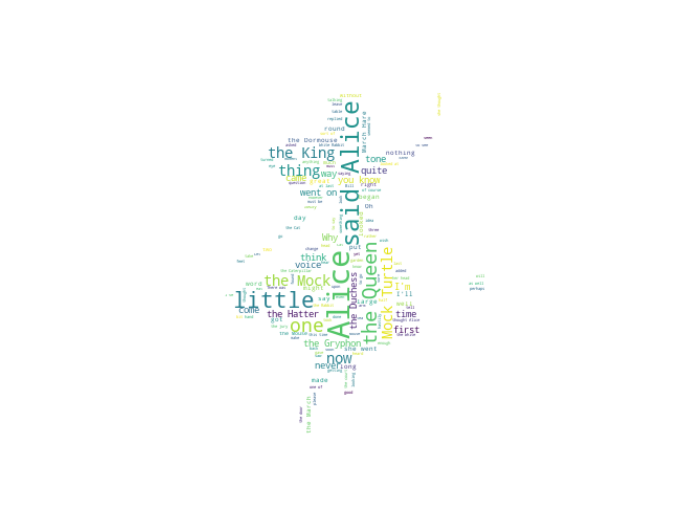

In [80]:
stop = set(STOPWORDS)
stop.add('said')

wc = WordCloud(mask = alice_mask, stopwords = stop,
              background_color = 'white').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

### konlpy

* https://konlpy.org/
* https://konlpy-ko.readthedocs.io/ko/v0.4.3/

* https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

* pip install konlpy


In [89]:
#from konlpy.tag import Twitter 
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

In [93]:
ko_text = kolaw.open('constitution.txt').read()
ko_text[:200]

stop_words = ['제', '월', '일', '조', '수', '때', '그', '이', '바', '및',
             '안', '정', '위' ,'관']  # 불용어 입력

t = Okt()
#t.nouns('아버지가방에들어가신다')

ko_token = t.nouns(ko_text)
len(ko_token)

ko_token = [each_word for each_word in ko_token if each_word not in stop_words]
len(ko_token)

ko = nltk.Text(ko_token)
ko.vocab()

data = ko.vocab().most_common(500)

(-0.5, 639.5, 479.5, -0.5)

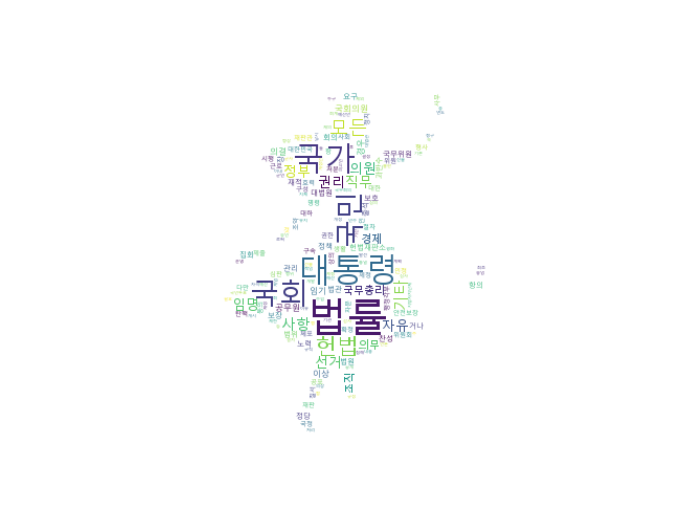

In [94]:
wc = WordCloud(mask = alice_mask, font_path = 'C:/Windows/Fonts/malgun.ttf',
               background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')